In [55]:
import astropy.constants as c, astropy.units as u
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Appendix: Code and plot

**Q2**

In [46]:
#Calculation of v_0
v_0 = np.sqrt(c.G*1e6*u.M_sun/u.Mpc/(1*u.mas.to(u.rad)))
v_0 = v_0.to(u.km/u.s)
v_0

<Quantity 941.87465588 km / s>

1092.0583388834045


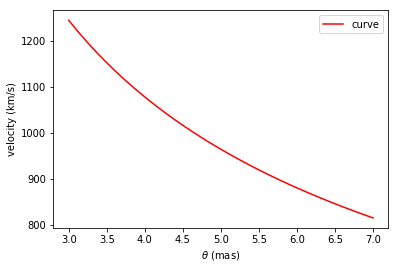

In [175]:
# extrapolation the given data
def v(theta, c):
    return c*theta**(-1/2)

theta_data = [5,6,7]
v_data = [965, 880, 815]
popt, pcov = curve_fit(v, theta_data, v_data)
popt

theta = np.linspace(3,7,70)
plt.plot(theta, v(theta, *popt), 'r-',
         label='curve')
plt.xlabel(r'$\theta$ (mas)');plt.ylabel('velocity (km/s)');plt.legend()

#find the expected velocity corresponding to 3.9 mas
print(v(3.9, *popt))

In [48]:
# calculation of a_0
a_0 = v_0**2/(10*u.Mpc*10*u.mas.to(u.rad))
a_0.to(u.km/u.s/u.yr)

<Quantity 1.87139204 km / (s yr)>

In [67]:
# Distance to the maser system
v = 1092.06*u.km/u.s
theta = 3.98*u.mas.to(u.rad)
a = 9.3*u.km/u.s/u.yr
D = v**2/theta/a
D.to(u.Mpc)

<Quantity 6.79681634 Mpc>

In [174]:
# mass of central black hole
1e8*9.3/1.87*(6.8/10)**2*(3.9/10)**2*u.M_sun

<Quantity 34977469.09090909 solMass>

**Q3**

In [5]:
# load in data
P_3370 = [16.78,19.64,32.56,37.1,38.54,41.55,69.35,20.52,24.49,28.79,29.6,39.41,51.68,96.49,33.48,33.69,29.43,27.74,
          32.62,36.99,43.94,45.1,52.72,50.6,62.71]
mH_3370 = [25.89,26.21,25.56,24.67,24.63,24.48,23.83,25.5,24.95,24.88,24.94,24.84,24.76,23.9,24.95,24.93,25.25,25.35,
           25.3,25.22,24.37,24.6,24.94,23.99,23.58]

In [3]:
P_4258 = [11.6,28.13,65.23,10.8,11.16,23.81,23.83,29.48,36.12,50.89,66.89,93.23,95.92,22.42,29.48
,66.89,16.99,20.76,22.04,22.68,23.79,50.7,9.979,10.3,18.28,22.35,23.79,27.25,18.42,21.87,14.59
,15.64,42.82,12.47,18.19,14.31,20.57,29.05,12.65,16,16.34,25.12,34.41,23.98,26.07,29.63,34.57
,33.99,40.54,41.57,12.28,15.91,22.45,25.49,12.28,35.57,22.38,42.31,14.3,25.56,23,22.89,24.86
,45.4,32.4,92,14.31,20.57,29.05,36.79,16.03,17.02,16.7,31.78,12.25,23,22.89,28.26,11.99
,12.65,16.52,33.02,44.05,83.4,33.29,21.29,31.29,101.9,14.92,53.88,8.503,9.942,10.97,16.43,13.55
,8.024,31.74,8.92]

mH_4258 = [23.2,22.05,20.91,23.59,23.25,22.56,23.04,22.33,21.44,21.63,21.61,21.17,20.93,22.18,22.16
,21.48,22.83,22.17,22.05,22.77,21.97,22.19,24.06,23.26,22.49,22.46,22.41,22.96,22.61,23.09,22.99
,23.35,22.14,23.06,22.9,23.68,23,22.7,23.65,23.63,23.68,22.83,21.96,22.07,22.36,22.26,22.79
,22.7,22.56,21.91,22.86,23.8,22.39,22.19,23.33,21.46,23.12,22.14,23.56,22.34,22.85,22.21,22.88
,21.34,22.23,20.26,23.41,23.24,22.38,22.25,23.17,22.97,23.39,22.43,23.66,22.85,22.03,22.51,23.18
,23.43,23.02,21.93,21.57,20.56,22.56,23.31,22.7,20.22,23.44,21.76,23.98,24.23,23.68,23.62,23.32
,23.78,22.41,23.85]

29.55722589896634 26.747468856031176


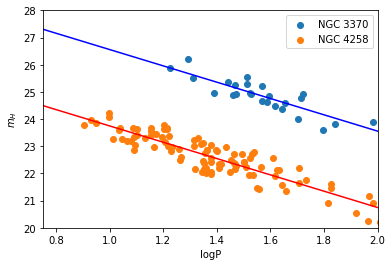

In [176]:
# Find the fitted curve assuming \alpha=-3
def m(log_P, m_0):
    return m_0-3*log_P

popt_3370, pcov_3370 = curve_fit(m, np.log10(P_3370), mH_3370)
popt_4258, pcov_4258 = curve_fit(m, np.log10(P_4258), mH_4258)

log_P = np.linspace(0.75,2,70)

plt.plot(np.log10(P), m(log_P, *popt_3370), 'b-')
plt.plot(np.log10(P), m(log_P, *popt_4258), 'r-')
plt.scatter(np.log10(P_3370), mH_3370,label = 'NGC 3370')
plt.scatter(np.log10(P_4258), mH_4258,label = 'NGC 4258')
plt.axis([0.75,2, 20,28])
plt.xlabel(r'logP');plt.ylabel('$m_H$');plt.legend()

#print the value of offset from fitted curve
print(m(0, *popt_3370),m(0, *popt_4258))

In [195]:
#Distance to NGC4285 and its uncertainty
D_2 = 6.8*10**((29.56-26.75)/5)
print(D_2)
sigma_2 = 10**((29.56-26.75)/5)*6.8*np.sqrt(0.05**2+1/25*2*0.35**2*np.log(10)**2)
print(sigma_2)

24.803268390941312
5.788181686924512


In [159]:
# calculating P(\alpha|m_H) in Q3.2
sigma=0.35
pdf_unnorm = []
m0_3370 = []
m0_4258 = []
for a in np.linspace(-3.2,-2.8,501):
    def m(log_P, m_0):
        return m_0+a*log_P
    popt_3370, pcov_3370 = curve_fit(m, np.log10(P_3370), mH_3370)
    popt_4258, pcov_4258 = curve_fit(m, np.log10(P_4258), mH_4258)
    m0_3370.append(m(0,*popt_3370))
    m0_4258.append(m(0,*popt_4258))
    chi = (np.sum((mH_3370-m(np.log10(P_3370),*popt_3370))**2)+np.sum((mH_4258-m(np.log10(P_4258),*popt_4258))**2))/sigma**2
    pdf_unnorm.append(np.exp(-0.5*chi**2+8000))
m0_3370 = np.array(m0_3370)    
m0_4258 = np.array(m0_4258)    

No handles with labels found to put in legend.


29.573848764855303 26.762073941472195


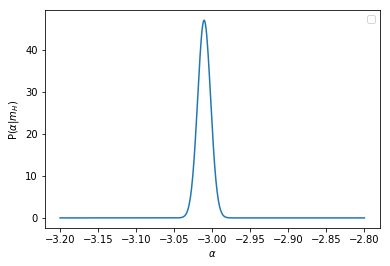

In [184]:
#Plot of P(\alpha|m_H) and calculation of best offset
import scipy.integrate as integrate
import scipy.special as special
norm = 1/np.trapz(pdf_unnorm,np.linspace(-3.2,-2.8,501))
pdf = norm*np.array(pdf_unnorm)
a = np.linspace(-3.2,-2.8,501)
plt.plot(a,pdf)
plt.xlabel(r'$\alpha$');plt.ylabel(r'P($\alpha$|$m_H$)');plt.legend()
m0_3370_best = np.trapz(pdf*m0_3370,np.linspace(-3.2,-2.8,501))
m0_4258_best = np.trapz(pdf*m0_4258,np.linspace(-3.2,-2.8,501))
print(m0_3370_best, m0_4258_best)

In [192]:
# Distance to the standard candle and its uncertainty
D_5 = 24.80*u.Mpc*10**((17.23-12.81)/5)
print(D_5)
sigma_5 = 10**((17.23-12.81)/5)*np.sqrt(5.79**2+1/25*24.8**2*(0.13**2+0.15**2)*np.log(10)**2)*u.km/u.s/u.Mpc
print(sigma_5)

189.86795851399157 Mpc
47.60462584555717 km / (Mpc s)


In [194]:
# Hubble constant and its uncertainty
H = (0.05*c.c/D_5).to(u.km/u.s/u.Mpc)
print(H)
sigma_H = 0.05*c.c/189.87**2*47.60/u.Mpc
print(sigma_H.to(u.km/u.s/u.Mpc))

78.94761716150964 km / (Mpc s)
19.79178475694822 km / (Mpc s)
